SOMMAIRE 

- [Mission 0 - analyse uni-varié et bi-varié ](#m3)
    - [Nature des billets](#q1)
    - [Diagonal](#q2)
    - [Hauteur gauche](#q3)
    - [Hauteur droite](#q4)
    - [Marge Haute](#q4)
    - [Marge basse](#q4)
    - [Taille](#q4)
    - [Analyse bi-varié](#q4)


In [1]:
from scipy.stats import kstest
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
sns.set_theme(style="whitegrid")
from Class import taux_remplissage

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

In [3]:
fakeTickets = pd.read_csv("../../lab/origin_values/faux_billets.csv", parse_dates=True) 
fakeTickets.shape

(170, 7)

In [5]:
fakeTickets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [4]:
fakeTickets.describe()


,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [4]:
## fonction qui permet de check etat des variable et leurs contenances
taux_remplissage(fakeTickets)

                                variable name    Valeurs null            types    Filling Rate  %
                                   is_genuine             170             bool          100.00 %
                                     diagonal             170          float64          100.00 %
                                  height_left             170          float64          100.00 %
                                 height_right             170          float64          100.00 %
                                   margin_low             170          float64          100.00 %
                                    margin_up             170          float64          100.00 %
                                       length             170          float64          100.00 %


In [31]:
numberGenuine = pd.DataFrame(fakeTickets[['is_genuine']].value_counts()).reset_index()
print(numberGenuine)

   is_genuine    0
0        True  100
1       False   70


In [32]:
fakeTickets['is_genuine'].value_counts(normalize=True)*100

True     58.823529
False    41.176471
Name: is_genuine, dtype: float64

## Nature des billets

## Diagonal

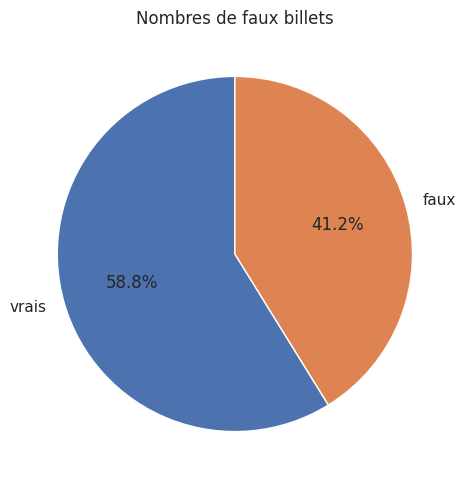

In [34]:
labels = ['vrais', 'faux']
sizes = [numberGenuine.iloc[0,1],numberGenuine.iloc[1,1]]
explode = (0, 0.1, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
plt.tight_layout()
plt.title('Nombres de faux billets')
plt.show()

<AxesSubplot: xlabel='diagonal'>

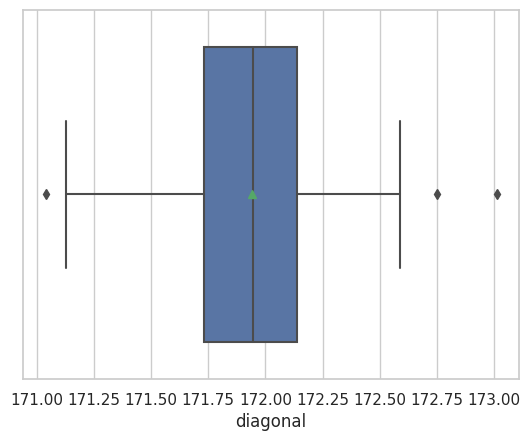

In [8]:
sns.boxplot(x=fakeTickets["diagonal"],showmeans=True )
# faible dispersion des données 
# sur l'analyse de la diagonal on constate que statistiquement que 3 billets sorte du lot de donnée
# avec un écart de la mediane significatif ce sont des outliers

<AxesSubplot: xlabel='diagonal'>

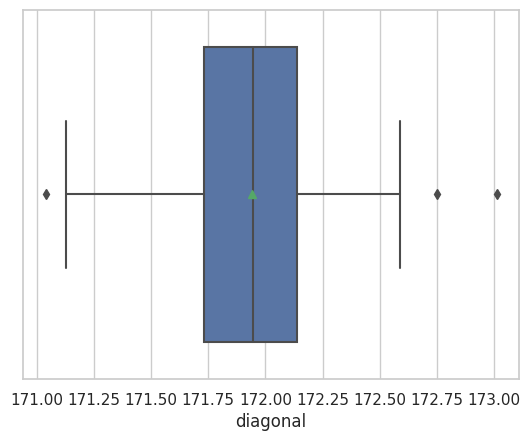

In [9]:
sns.boxplot(x=fakeTickets["diagonal"],hue=fakeTickets["is_genuine"],showmeans=True )

In [10]:
fakeTickets.loc[(fakeTickets["diagonal"] > 172.65)| (fakeTickets["diagonal"] < 171.11) ]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
34,True,172.75,104.33,103.97,4.34,3.14,113.12
70,True,171.04,103.84,103.64,4.22,3.36,112.70
166,False,173.01,104.59,104.31,5.04,3.05,110.91


In [11]:
print("l'analyse de la diagonal ne nous permet pas de determiner les vrais des faux billets")

l'analyse de la diagonal ne nous permet pas de determiner les vrais des faux billets


## Hauteur gauche

<AxesSubplot: xlabel='height_left'>

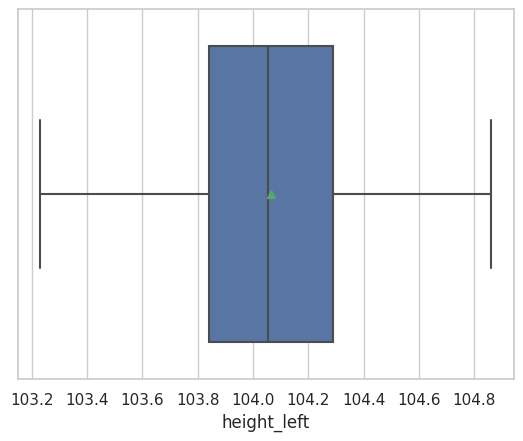

In [12]:
sns.boxplot(x=fakeTickets["height_left"],showmeans=True )
# faibles dispersion des données 

## Hauteur droite

<AxesSubplot: xlabel='height_right'>

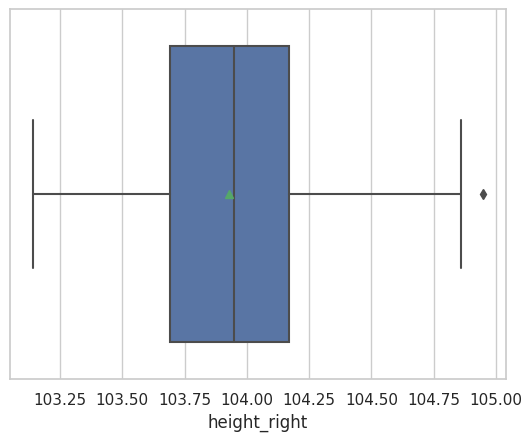

In [13]:
sns.boxplot(x=fakeTickets["height_right"],showmeans=True )

# on identifie 1 outliers dans ce graph 

In [14]:
fakeTickets.loc[(fakeTickets["height_right"] > 104.90)]
# faibles dispersion des données 
# Cette outliers fait partie des vrais billets. On peux s'appuyer sur un indice de reconnaissances 
# outliers est proche du Q3

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83


## Marge haute

<AxesSubplot: xlabel='margin_up'>

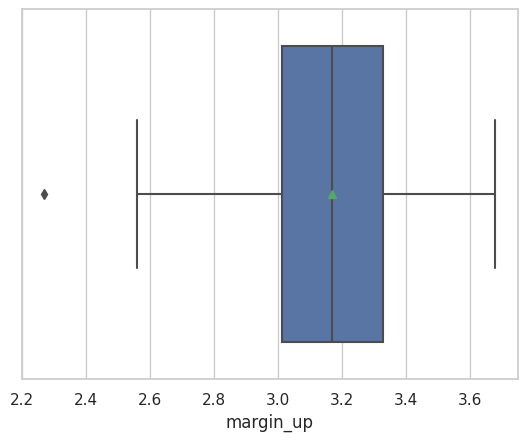

In [15]:
sns.boxplot(x=fakeTickets["margin_up"],showmeans=True )

In [16]:
fakeTickets.loc[(fakeTickets["margin_up"] < 2.4)]
#faibles dispersion des données 
# Cette outliers fait partie des vrais billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
4,True,172.05,103.7,103.75,5.04,2.27,113.55


## Marge basse

<AxesSubplot: xlabel='margin_low'>

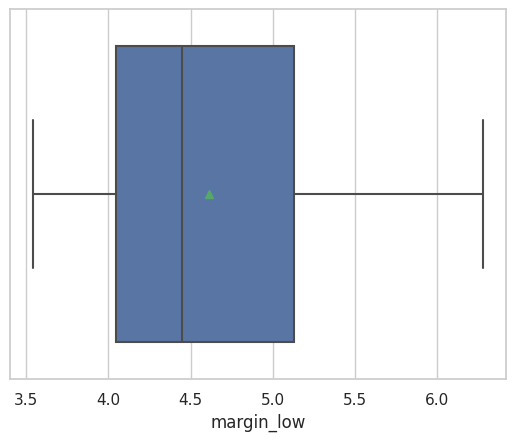

In [17]:
sns.boxplot(x=fakeTickets["margin_low"],showmeans=True ) 

## Taille

<AxesSubplot: xlabel='length'>

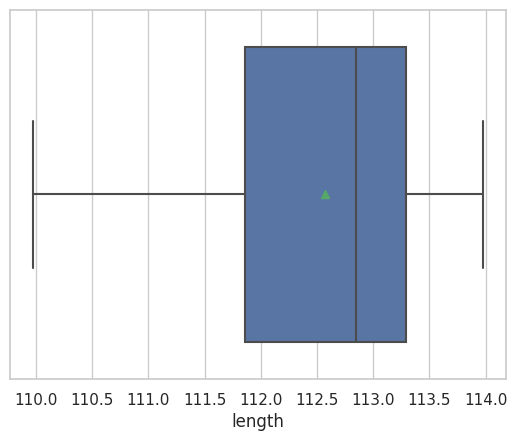

In [18]:
sns.boxplot(x=fakeTickets["length"],showmeans=True )
# faibles dispersion des données 

# Analyse bi-varié

## Diagonal

<AxesSubplot: xlabel='is_genuine', ylabel='diagonal'>

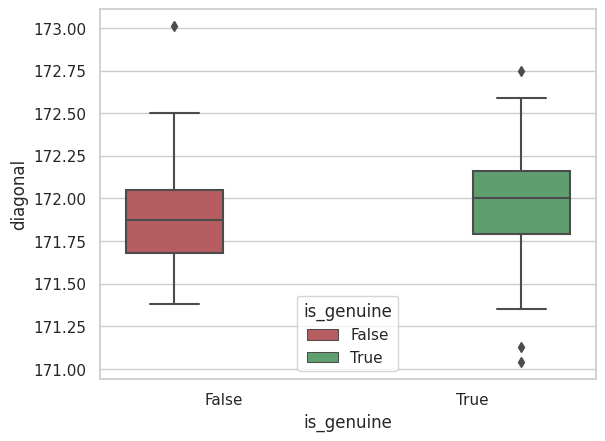

In [19]:
sns.boxplot(x="is_genuine",y="diagonal",
            hue="is_genuine", palette=["r", "g"],
            data=fakeTickets)

## Hauteur gauche

<AxesSubplot: xlabel='is_genuine', ylabel='height_left'>

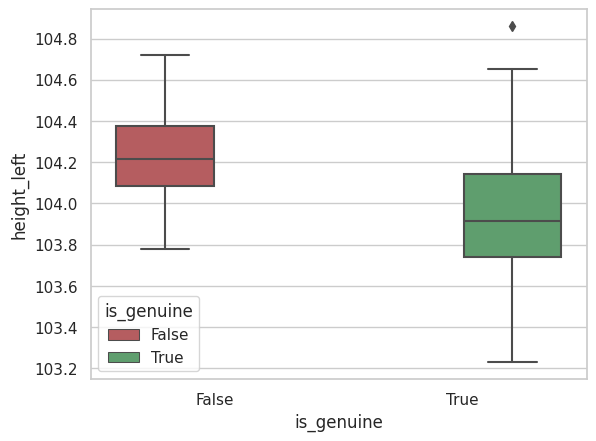

In [20]:
sns.boxplot(x="is_genuine",y="height_left",
            hue="is_genuine", palette=["r", "g"],
            data=fakeTickets)

## Hauteur droite

<AxesSubplot: xlabel='is_genuine', ylabel='height_right'>

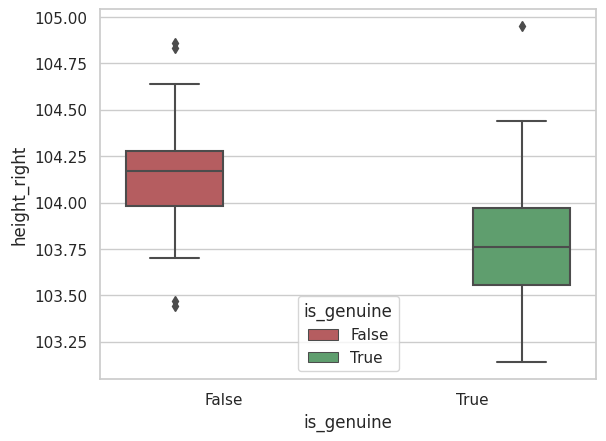

In [21]:
sns.boxplot(x="is_genuine",y="height_right",
            hue="is_genuine", palette=["r", "g"],
            data=fakeTickets)

## Marge basse

<AxesSubplot: xlabel='is_genuine', ylabel='margin_low'>

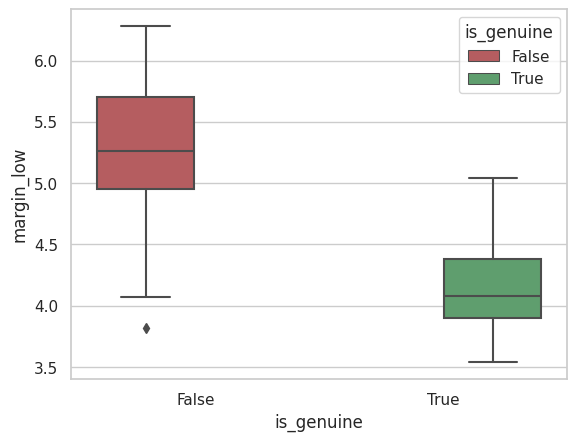

In [22]:
sns.boxplot(x="is_genuine",y="margin_low",
            hue="is_genuine", palette=["r", "g"],
            data=fakeTickets)

## Marge haute

<AxesSubplot: xlabel='is_genuine', ylabel='margin_up'>

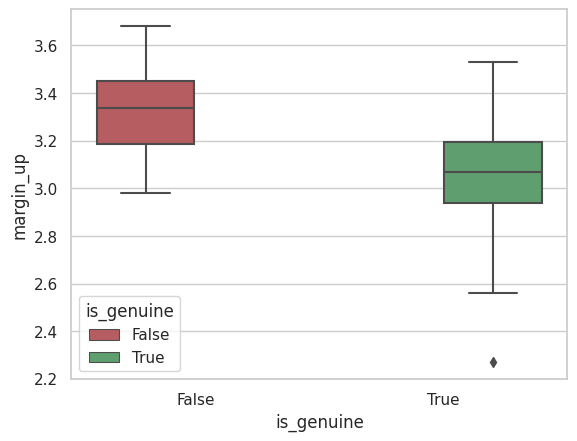

In [23]:
sns.boxplot(x="is_genuine",y="margin_up",
            hue="is_genuine", palette=["r", "g"],
            data=fakeTickets)

## Taille

<AxesSubplot: xlabel='is_genuine', ylabel='length'>

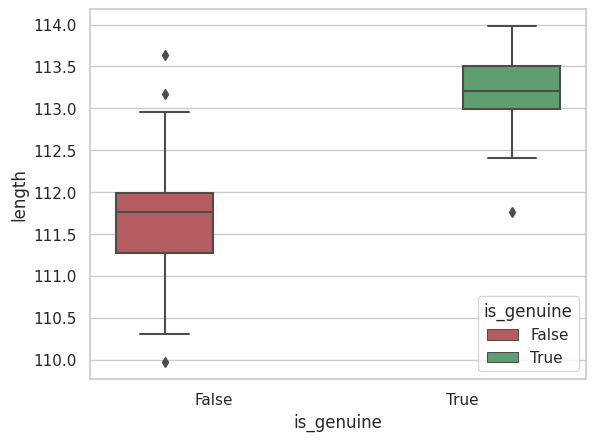

In [24]:
sns.boxplot(x="is_genuine",y="length",
            hue="is_genuine", palette=["r", "g"],
            data=fakeTickets)

# Analyse multi-varié

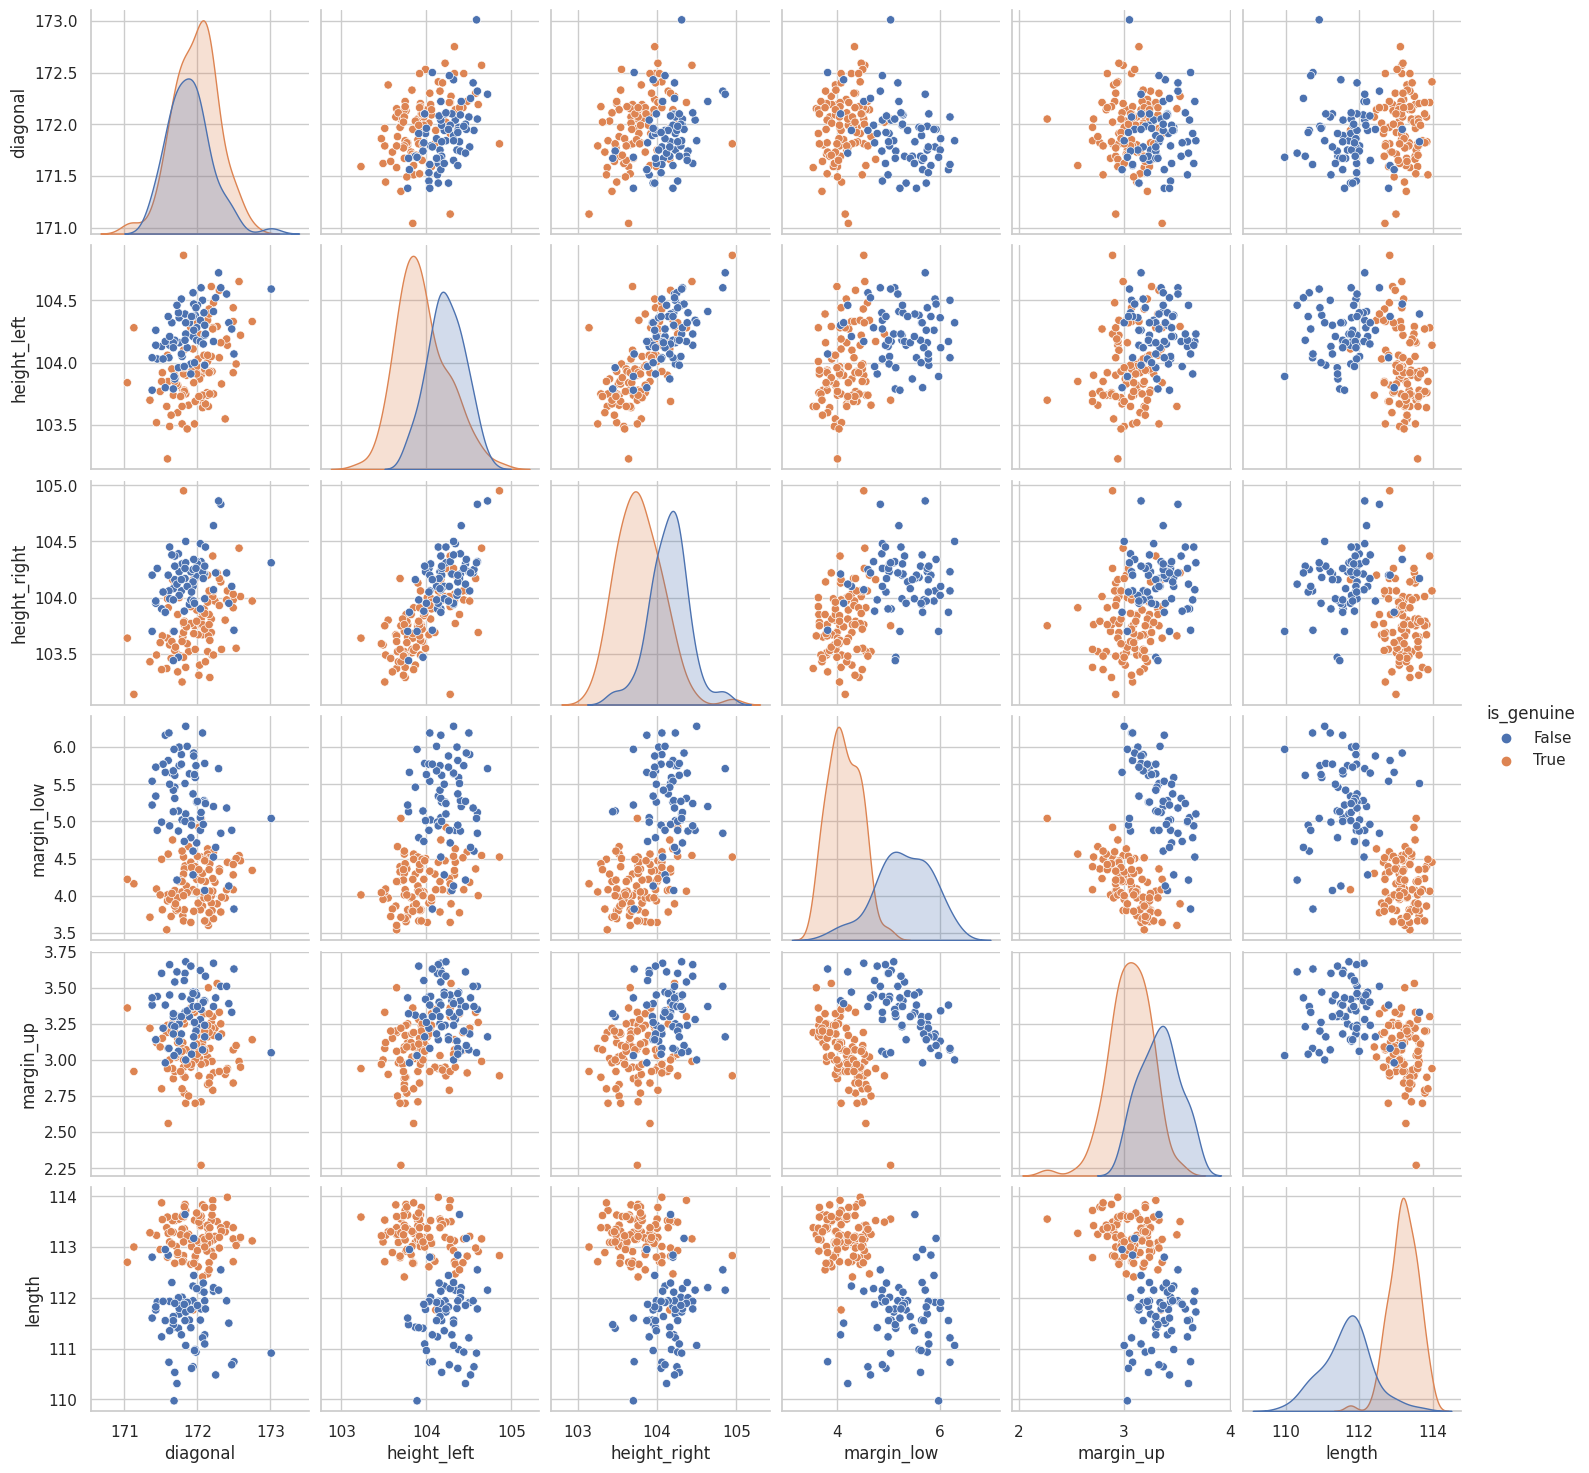

In [25]:
## ajouter pairplot

sns.pairplot(fakeTickets, hue="is_genuine")

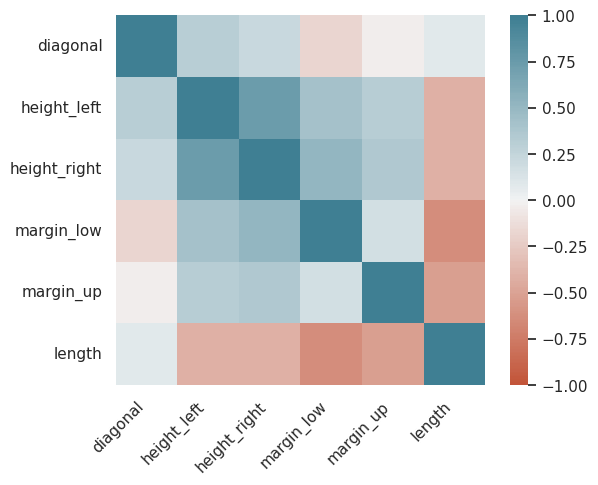

In [26]:
## ajouter au bouleen avec des O et 1
corr = fakeTickets.select_dtypes(exclude="bool").corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [27]:
## correlation de pearson en tableau
corr

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000
